<a href="https://colab.research.google.com/github/nara0102/E-Commerence_Analysis/blob/main/E_Commerence_Analysis_%7C_Data_Classification_and_Summarization_Using_IBM_Granite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"Baking Data into Strategy: E-Commerce Purchase Time Analysis for Retail Discount Optimization"**

# 1. Import Library yang diperlukan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

# 2. Membaca dataset yang akan digunakan

In [ ]:
# 2. Load Dataset
df = pd.read_csv('/content/ecommerence_data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Dataset ini berisi data transaksi retail online dari sebuah perusahaan di Inggris selama periode Desember 2010 hingga Desember 2011.

Kolom-kolom dalam dataset:

- **InvoiceNo**   : Nomor faktur unik untuk setiap transaksi
- **StockCode**   : Kode produk
- **Description**	: Nama/deskripsi produk
- **Quantity**    :	Jumlah barang yang dibeli
- **InvoiceDate** : Tanggal dan waktu transaksi
- **UnitPrice**   :	Harga per unit produk
- **CustomerID**. :	ID pelanggan (bisa kosong)
- **Country**.    :	Negara asal pelanggan

# 3. Data Cleaningg

In [12]:
df_clean = df.copy()
df_clean.dropna(inplace=True) #(missing values)

# Hapus transaksi pengembalian (Quantity negatif)
df_clean = df_clean[df_clean['Quantity'] > 0].copy()

# Ubah kolom waktu transaksi ke format datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Menambahkan fitur jam transaksi
df_clean.loc[:, 'Hour'] = df_clean['InvoiceDate'].dt.hour

# Menambahkan label waktu pembelian (klasifikasi: Day / Night)
df_clean.loc[:, 'PurchaseLabel'] = df_clean['Hour'].apply(
    lambda x: 'Night' if x >= 18 else 'Day'
)


# 4. EDA (Exploratory Data Analysis)

Text(0.5, 1.0, 'Distribusi Jam Pembelian')

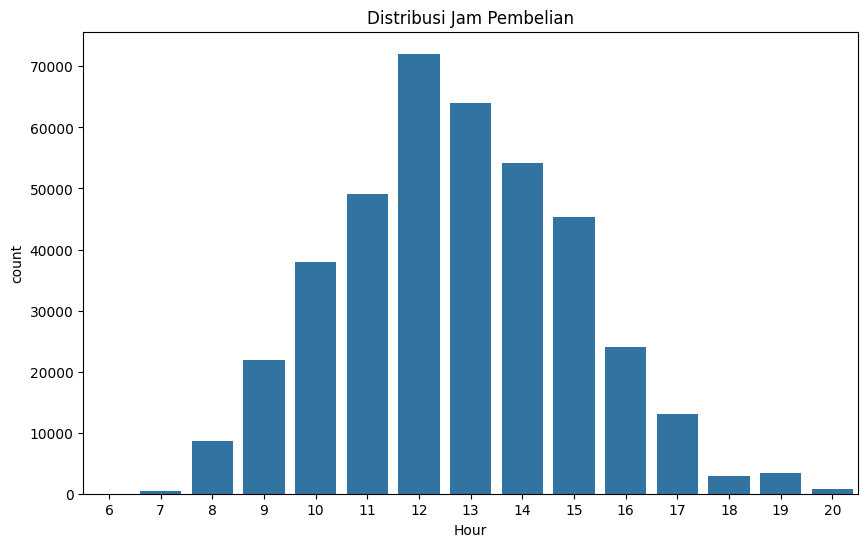

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=df)
plt.title('Distribusi Jam Pembelian')


## Visualisasi Teks
frekuensi kata yang sering muncul

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

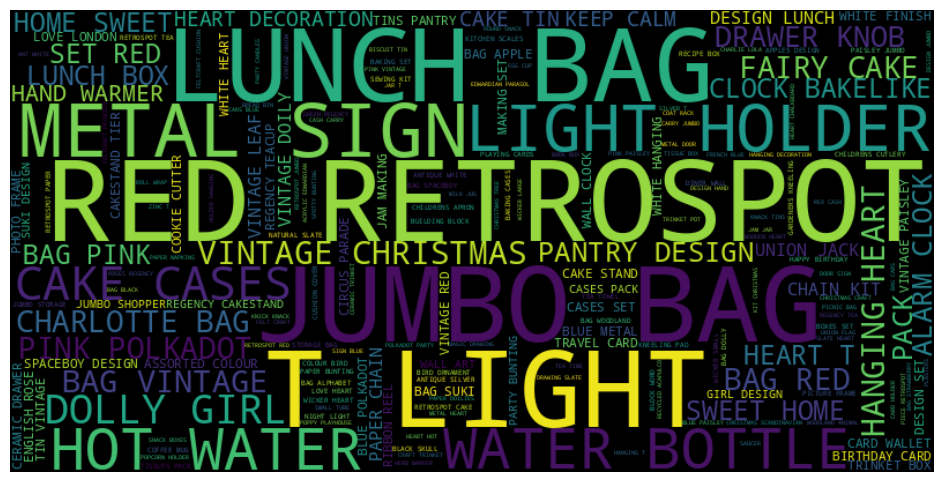

In [ ]:
# Wordcloud Produk
product_text = " ".join(df['Description'].astype(str))
wordcloud = WordCloud(width=800, height=400).generate(product_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 5. Membuat Label dan Fitur untuk Prediksi Waktu Pembelian

## Feature Engineering untuk Klasifikasi

In [13]:
df['PurchaseLabel'] = df['Hour'].apply(lambda x: 'Night' if x >= 18 else 'Day')
X = df[['Quantity', 'UnitPrice']]
y = df['PurchaseLabel']

## Splitting & Model Training

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

## Evaluasi Model

              precision    recall  f1-score   support

         Day       0.98      1.00      0.99     78168
       Night       0.22      0.00      0.01      1417

    accuracy                           0.98     79585
   macro avg       0.60      0.50      0.50     79585
weighted avg       0.97      0.98      0.97     79585



<Axes: >

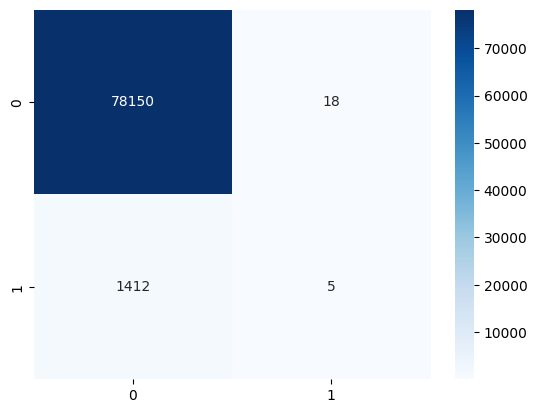

In [15]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')


# 6. IBM Granite Models

## Menginstall pustaka python yang diperlukan

In [17]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.0 MB/s eta 0:00:00


## inisialisasi dan menyiapkan akses ke model AI dari Replicate

In [18]:
from langchain_community.llms import Replicate
from google.colab import userdata
import os

api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token

In [23]:
parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 4096,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.7,
  "stopping_criteria": "length (300 tokens)",
  "stopping_sequence": None
}

llm = Replicate(
    model = "ibm-granite/granite-3.3-8b-instruct"
)

### Promt pertama untuk melihat insight bisnis berdasarkan hasil dari confusion matrix

In [24]:
# Contoh input evaluasi yang kamu simpan dalam list 'review'
evaluasi_model = [
    "Label Day memiliki precision 0.98 dan recall 1.00 dengan f1-score 0.99. Support: 78,168.",
    "Label Night memiliki precision 0.22 dan recall 0.00 dengan f1-score 0.01. Support: 1,417.",
    "Akurasi keseluruhan model adalah 98%, namun ini sangat bias ke transaksi Day.",
    "Model gagal mengenali transaksi Night, menunjukkan ketimpangan distribusi data."
]

# Loop untuk kirim setiap evaluasi sebagai bagian dari prompt
for data in evaluasi_model:
    print(f"\n📝 Review: {data}")

    # Prompt untuk Granite — bisa kamu sesuaikan temanya
    prompt = f"""
Saya melakukan klasifikasi waktu pembelian e-commerce UK menggunakan Random Forest, dan mendapatkan hasil evaluasi sebagai berikut:

{data}

Berikan insight bisnis dan rekomendasi teknis berdasarkan evaluasi tersebut.
"""

    print("📨 Prompt terkirim ke Granite:\n", prompt)

    # Kirim prompt ke Granite model (via langchain_community wrapper)
    output = llm.invoke(prompt)

    print("🧠 Insight dari IBM Granite:\n", output)
    print("="*60)



📝 Review: Label Day memiliki precision 0.98 dan recall 1.00 dengan f1-score 0.99. Support: 78,168.
📨 Prompt terkirim ke Granite:
 
Saya melakukan klasifikasi waktu pembelian e-commerce UK menggunakan Random Forest, dan mendapatkan hasil evaluasi sebagai berikut:

Label Day memiliki precision 0.98 dan recall 1.00 dengan f1-score 0.99. Support: 78,168.

Berikan insight bisnis dan rekomendasi teknis berdasarkan evaluasi tersebut.

🧠 Insight dari IBM Granite:
 1. Insight Bisnis:

- **Tingkat Tingkat Tepat (Precision)**: Pecinta model Anda akan menikmati tingkat tingkat tepat yang sangat tinggi (0.98) untuk klasifikasi hari pembelian. Ini berarti bahwa model sangat efektif dalam mengidentifikasi hari pembelian yang benar tanpa mengalami banyak kesalahan yang menyebabkan pengguna harus memfilter hasil yang diberikan.

- **Tingkat Penetan (Recall)**: Model mencapai recall penuh (1.00), yang menunjukkan bahwa model berhasil mengidentifikasi semua instans hari pembelian yang sebenarnya ada dal

### Promt ke dua untuk insigt lanjutan

In [31]:
prompt_text = """
Model klasifikasi transaksi e-commerce menunjukkan performa sangat tinggi untuk label "Day", tapi gagal mengenali transaksi "Night".

Berikan insight bisnis berdasarkan dominasi transaksi siang hari, terutama strategi diskon di toko roti pada jam 11:00–15:00.

"""

# Kirim prompt dan tampilkan output
output = llm.invoke(prompt_text)

print("🧠 Insight dari IBM Granite:\n")
print(output)

🧠 Insight dari IBM Granite:

Dari data klasifikasi transaksi e-commerce yang mengindikasi prestasi klasifikasi yang sangat tinggi untuk label "Day" namun kegagalan mengidentifikasi transaksi "Night", dapat diambil beberapa insight bisnis:

1. **Pertimbangkan Strategi Marketing yang Berfokus pada Jam Siang**: Karena model mengindikasikan dominan transaksi terjadi pada siang hari, toko roti bisa mengembangkan strategi marketing yang berfokus pada waktu saat transaksi paling aktif. Hal ini dapat dilakukan melalui promosi spesifik yang tersedia pada jam 11:00 hingga 15:00, menarik perhatian pelanggan dengan diskon atau promosi spesial secara langsung.

2. **Optimasi Operasional**: Pertimbangkan untuk meningkatkan ketersediaan dan kualitas produk saat waktu yang paling sibuk. Pastikan ada stok yang cukup, serta tenaga kerja yang sehat untuk melayani pesanan secara cepat dan efisien.

3. **Analisis Pelanggan**: Lakukan penelitian lebih lanjut terhadap pola pembelian pelanggan untuk memahami 

### Bar Chart Evaluasi per Label

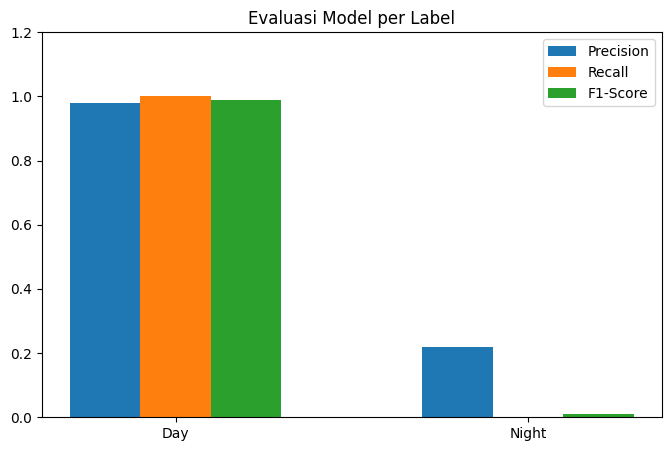

In [32]:
import matplotlib.pyplot as plt

labels = ['Day', 'Night']
precision = [0.98, 0.22]
recall = [1.00, 0.00]
f1 = [0.99, 0.01]

x = range(len(labels))
plt.figure(figsize=(8,5))
plt.bar(x, precision, width=0.2, label='Precision', align='center')
plt.bar([p+0.2 for p in x], recall, width=0.2, label='Recall')
plt.bar([p+0.4 for p in x], f1, width=0.2, label='F1-Score')

plt.xticks([p + 0.2 for p in x], labels)
plt.ylim(0, 1.2)
plt.legend()
plt.title('Evaluasi Model per Label')
plt.show()


### Pie Chart untuk Distribusi Label (Day vs Night)

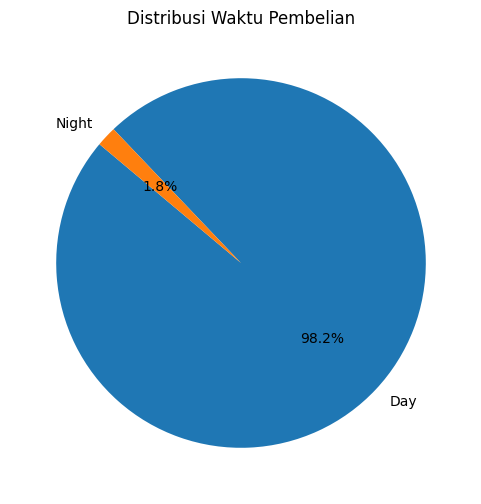

In [27]:
label_counts = df['PurchaseLabel'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Waktu Pembelian')
plt.show()
